In [2]:
# imports

import os
import torch
from skimage import io, measure
import numpy as np
import matplotlib.pyplot as plt

from tifffile import imread, imsave

import warnings
warnings.filterwarnings('ignore')

from tifffile import imread




if not torch.cuda.is_available():
    raise ValueError("GPU not found, code will run on CPU and can be extremely slow!")
else:
    device = torch.device("cuda:0")

import time
from glob import glob
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint, EarlyStopping
import torch.optim as optim
import torch.utils.data as dt


import os
os.chdir('/mnt/c/Users/ankit/Desktop/Msc AIML/msc-project/GAP/gap')
from GAP_UNET_ResBlockv3 import UN
from BinomDatasetv4 import BinomDataset
from inferencev2 import sample_image
from tasks import inpainting

In [134]:
def stats(img):
    print(f'''
Mean : {img.mean()}\n
Sum : {img.sum()}\n
Min : {img.min()}\n
Max : {img.max()}\n''')

### The target is always mean normalized

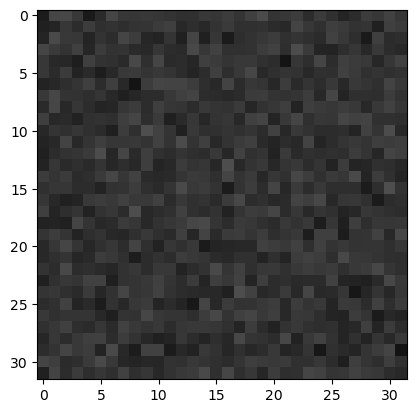

In [135]:
img = np.random.normal(loc = 5, scale = 1, size = (1, 32, 32, 1))
img/=img.mean()
plt.imshow(img[0,:,:,0], vmin = 0, vmax = 5, cmap= 'gray')

In [137]:
stats(img) # type: ignore


Mean : 1.0

Sum : 1024.0

Min : 0.37658939333817426

Max : 1.5416760609736913



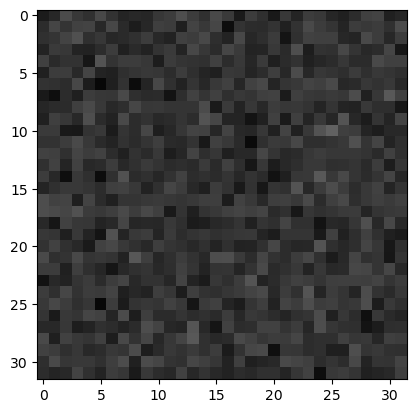

In [136]:
pimg = np.random.normal(loc = 9, scale = 2, size = (1, 32, 32, 1)) - 2
pimg/=pimg.mean()
plt.imshow(pimg[0, :, :, 0], vmin = 0, vmax = 5, cmap ='gray')

In [138]:
stats(pimg)


Mean : 1.0

Sum : 1024.0

Min : 0.14074282425226473

Max : 1.905476135516082



In [89]:
model = UN(levels= 5)
loss = model.photonLoss

In [104]:
img = torch.from_numpy(img)
pimg = torch.from_numpy(pimg)

TypeError: expected np.ndarray (got Tensor)

In [105]:
img2 = img/img.sum()
pimg2 = pimg/pimg.sum()

In [111]:
loss(pimg, pimg), loss(img, img)

(tensor(-0.0393, dtype=torch.float64), tensor(-0.0200, dtype=torch.float64))

In [112]:
loss(pimg, img), loss(img, pimg)

(tensor(0.0359, dtype=torch.float64), tensor(0.0171, dtype=torch.float64))

In [140]:
0.14 * 0.14, 0.14 * 0.5

(0.019600000000000003, 0.07)

In [142]:
1 * 0.5, 0.5 * 0.5

(0.5, 0.25)

In [145]:
np.log(np.exp(5))

5.0

In [10]:
img = np.zeros((32, 32))
img[1: 5, :] = 1
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
img/=img.mean()
(img + img).mean()

2.0

PhotonLoss prefers high intensity output by default, when we provided with high intensity condition image in the input, it learned to output it straightaway as it would gives very -ve loss.